In [1]:
# author: Grismely M. Hiraldo

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [3]:
# import the Iris data set

iris = datasets.load_iris()
X = iris.data
Y = iris.target
Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2
x_min, x_max = X.min() - 0.5, X.max() + 1.5

In [4]:
# show the data

# for i in range (len(Y)):
#     print (i, X[i,:],Y[i])

In [5]:
# get Iris classifications

IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
          

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


In [6]:
# setup Iris feature lablels

IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])


sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


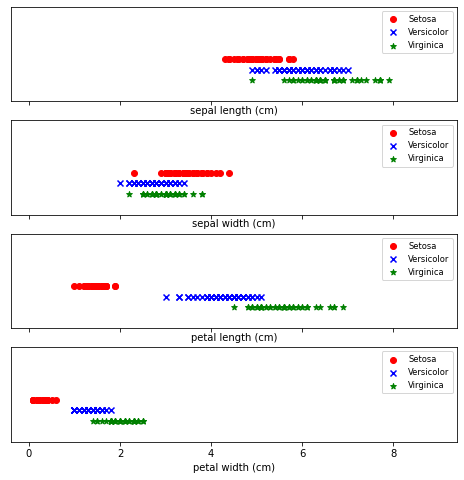

In [7]:
# plot data for all features 

plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)

for i in range(4):
    x1F = IrisF[i]
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
      
plt.show()    

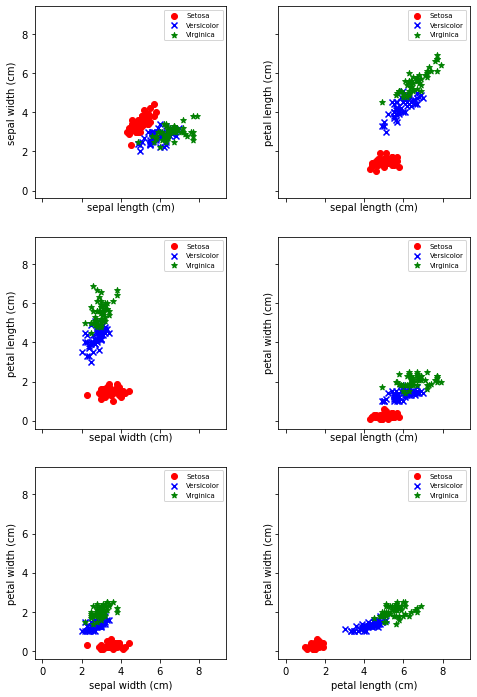

In [8]:
# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

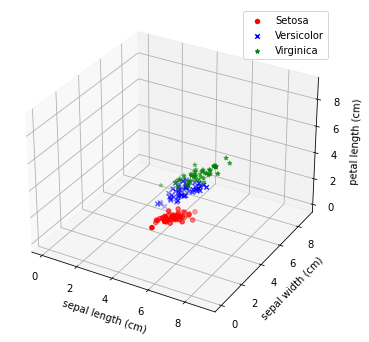

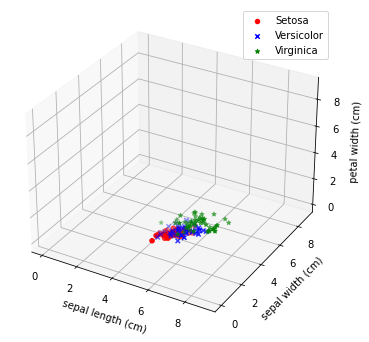

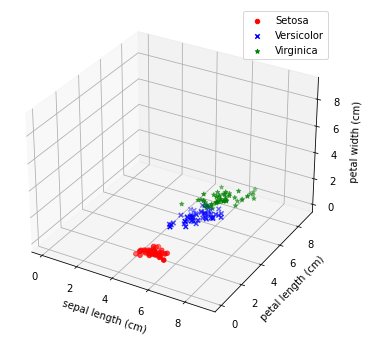

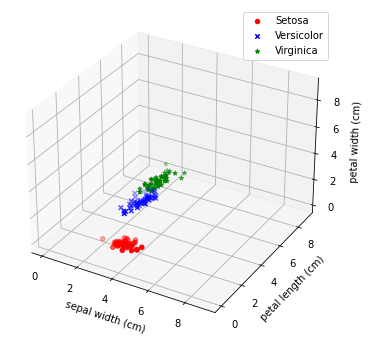

In [9]:
# plot data for all combinations of three features 

plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show()    

In [10]:
# now choose the classes and features to be modeled.

# note that if more than two classes are specified, scikit learn will use a multiclass model.

In [37]:
# choose the classes and features to be included in the model

cdx = np.array([0,1,2])             # this array contains the classes to be considered (can be 2-3 classes)
fdx = np.array([0])           # this array contains the features to be considered (can be 1-4 features)

nC = len(cdx)
nF = len(fdx)

print ('\nClasses')
for i in range(nC):
    print (cdx[i],IrisC[cdx[i]])
    
print ('\nFeatures')
for i in range(nF):
    print (fdx[i],IrisF[fdx[i]])


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)


In [38]:
# build the XX and YY arrays
# these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

i = 0
numY = 0
for i in range(len(Y)):
    for j in range(nC):
        if Y[i] == IC[cdx[j]]:
            numY += 1

YY = np.zeros((numY))
XX = np.zeros((numY,nF))
if (len(fdx) == 1):
    XXzeros0 = (0. * XX) + .2
    XXzeros1 = (0. * XX) 
    XXzeros2 = (0. * XX) - .2

j = 0
for i in range(len(Y)):
    for k in range(nC):
        if Y[i] == IC[cdx[k]]:        
            YY[j] = IC[cdx[k]]
            for m in range(nF):
                XX[j,m] = X[i,fdx[m]] 
            j += 1


In [39]:
# fit the model

# clf = Perceptron(tol=1e-4, random_state=0)
clf = SGDClassifier(tol=1e-4, random_state=0)

clf.fit(XX,YY)

print('\nScore: ',clf.score(XX,YY))


Score:  0.68


In [40]:
P = clf.get_params()
print ('\nAttributes: ',P)


Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [1]:
## plot data for this pair of features and classes

plt.close('all')

if (len(fdx) == 1):
    
    fig, ax = plt.subplots(figsize=(8,2))
    
    xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
    yy = clf.predict(xx)
    
    xxzeros1 = (0. * xx) + .5

# plot the decision regions

    if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                    color=pltC[0], marker='.')
    if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                    color=pltC[1], marker='.')
    if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                    color=pltC[2], marker='.')   

# plot the data

    if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                    color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                    color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                    color=pltC[2], marker=pltM[2], label=IrisC[2])    
    
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(-1.,+2.)
    ax.set_xlabel(IrisF[fdx[0]])
    ax.axes.yaxis.set_visible(False)
    ax.legend(loc='upper right', fontsize='x-small')
    plt.show()    

elif (len(fdx) == 2):
    
    fig, ax = plt.subplots(figsize=(8,8))

    xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
    yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    yy = yy.reshape(xx1.shape)

# plot the decision regions    
    
    if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                    color=pltCback[0], marker='.')
    if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                    color=pltCback[1], marker='.')
    if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                    color=pltCback[2], marker='.')    

# plot the data

    if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                    color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                    color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                    color=pltC[2], marker=pltM[2], label=IrisC[2])
        
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_xlabel(IrisF[fdx[0]])
    ax.set_ylabel(IrisF[fdx[1]])
    ax.legend(loc='upper right', fontsize='small')
    plt.show()    
    
elif (len(fdx) == 3):
    
    ixm = fdx[0]
    iym = fdx[1]
    izm = fdx[2]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   

# plot the data points

    if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])    

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='small')
    plt.show() 
    
# if there are two classes, add the decision boundary and plot again
            
    A = clf.fit(XX,YY)
    Acl =  A.classes_
    if (len(Acl) == 2):  
        
        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

       
        Ai = A.intercept_
        Acoef = A.coef_
        xgrid = np.arange(x_min,x_max,0.1)       
        nx = len(xgrid)
        for i in range(nx):
            for j in range(nx):
                z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show()         


NameError: name 'plt' is not defined

In [30]:
print('\nScore: ',clf.score(XX,YY))


Score:  0.68


In [31]:
A = clf.fit(XX,YY)

print ('\nnumber of classes ',len(A.classes_))
print ('classes_          ',A.classes_)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )
print ('\nIntercept_')
print (A.intercept_)
print ('Coef_')
print (A.coef_)


if (len(fdx)==1):
    for i in range (len(A.intercept_)):
        print ('\nboundary      ',-A.intercept_[i]/A.coef_[i])


number of classes  3
classes_           [0. 1. 2.]
n_features_in_     1
n_iter_            41

Intercept_
[ 321.18659178  -44.90647586 -319.22672282]
Coef_
[[-64.624423  ]
 [  3.35929149]
 [ 45.59199814]]

boundary       [4.97004966]

boundary       [13.36784138]

boundary       [7.0018147]
